# Titanic Data Analysis

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Task-1: Load dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## task- 2: data cleaning

In [4]:
df.info()

df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


<Axes: xlabel='age', ylabel='Count'>

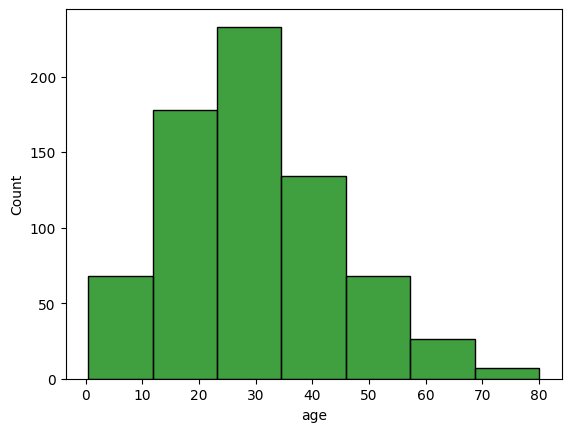

In [5]:
sns.histplot(x='age',bins=7,data=df, color='green' )



<Axes: xlabel='pclass', ylabel='count'>

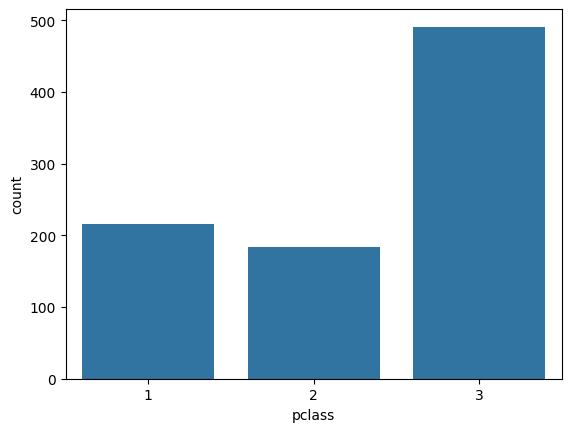

In [6]:
sns.countplot(x='pclass', data=df)

## Task 4: Biveriate

In [7]:
Survival_Rate = df.groupby('sex')['survived'].mean()

Survival_Rate

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

<Axes: xlabel='pclass', ylabel='survived'>

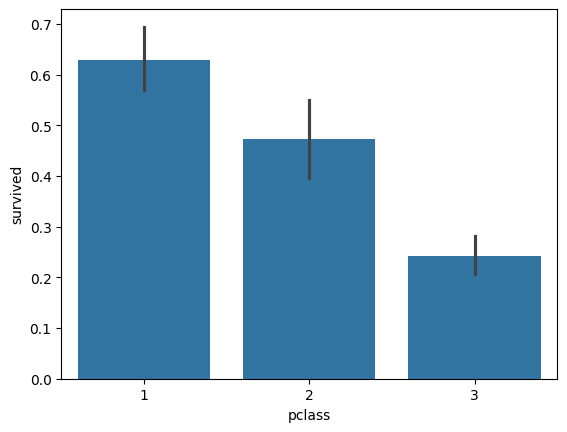

In [8]:
sns.barplot(x='pclass', y='survived', data=df)


<Axes: xlabel='sex', ylabel='survived'>

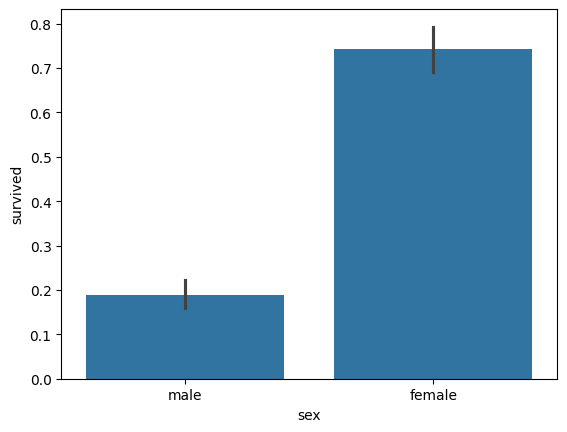

In [9]:
sns.barplot(x='sex', y='survived', data=df)


<Axes: xlabel='age', ylabel='Count'>

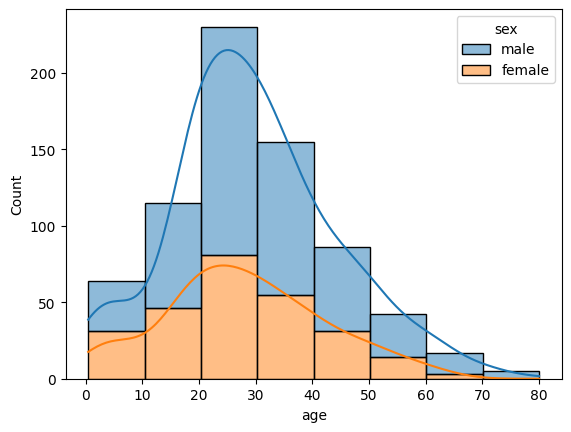

In [10]:
sns.histplot(x='age', data=df, hue='sex', bins=8, multiple='stack', kde='true')

<Axes: xlabel='age', ylabel='Count'>

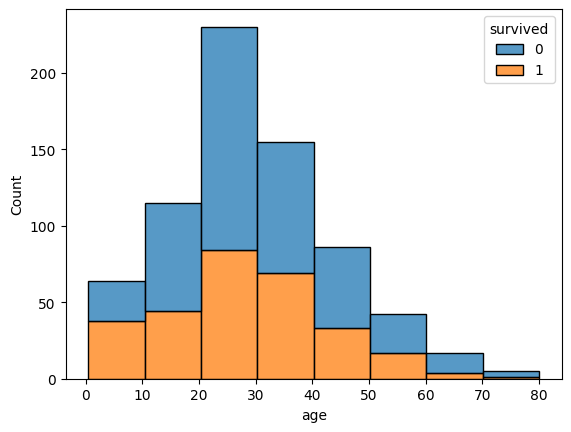

In [11]:
sns.histplot(x='age', data=df, hue='survived', bins=8, multiple='stack')


In [12]:
## Create new column
df['Family Size'] = df['parch'] + df['sibsp'] + 1

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


<Axes: xlabel='Family Size', ylabel='survived'>

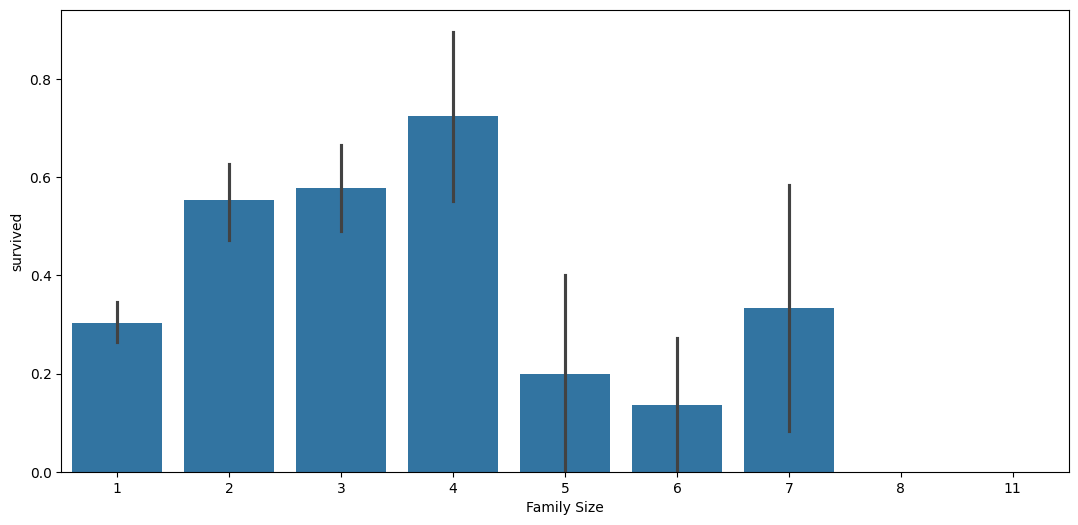

In [14]:
plt.figure(figsize=(13,6))
sns.barplot(x='Family Size', y='survived', data=df)

## Correlation

<Axes: >

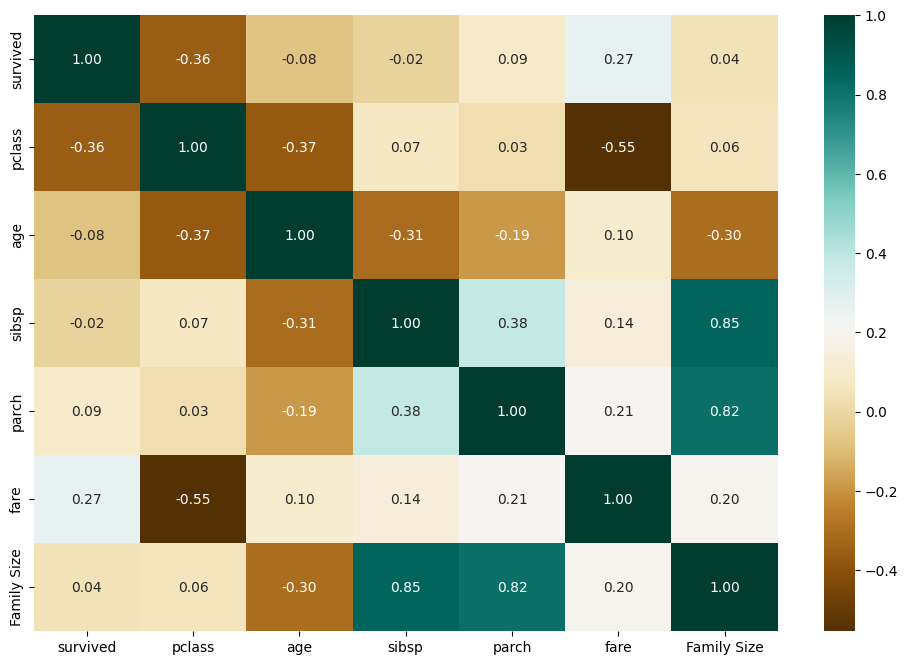

In [40]:

plt.figure(figsize=(12,8))
num_df = df.select_dtypes(include='number')
num_df.corr()
sns.heatmap(num_df.corr(), annot=True, cmap='BrBG', fmt=".2f")

# **Summerize the EDA**


*   we see female are survived more than male so sex is an important matrix
*   we see lower age group survived it means Child survived much than seniors
*  1st class passengers survived more than 2nd and 3rd so it's an important matrix



In [16]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'fare']

scaler = StandardScaler()

for cols in num_cols:
    df[cols] = scaler.fit_transform(df[[cols]])

In [22]:
df.head()
df.columns

df.info()

df.drop(df[['deck', 'alive']], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Family Size  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Family Size
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,Southampton,False,2
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,Cherbourg,False,2
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,Southampton,True,1
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,Southampton,False,2
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,-0.386671,S,Second,man,True,Southampton,True,1
887,1,1,female,-0.737041,0,0,-0.044381,S,First,woman,False,Southampton,True,1
888,0,3,female,NaN,1,2,-0.176263,S,Third,woman,False,Southampton,False,4
889,1,1,male,-0.254825,0,0,-0.044381,C,First,man,True,Cherbourg,True,1


### Feature Engineering

In [36]:
df = pd.get_dummies(df, drop_first=True)

df.dropna()
df.head()

df.dropna(subset=['age'], inplace=True)
# df = df.fillna(0).astype('int64')

In [39]:
df.isnull().sum()

df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'Family Size', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third', 'who_man', 'who_woman', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes'],
      dtype='object')

## Ultimate Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


model = LogisticRegression()

X = df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'Family Size', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third', 'who_man', 'who_woman',
       'embark_town_Queenstown', 'embark_town_Southampton']]

Y = df['survived']

X_train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model.fit(X_train, Y_Train)

y_pred = model.predict(X_test)



## Evaluation using accuracy score

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)

print(f'The Ultimate accuracy of this model {accuracy:.2f}  (Logistic Regression on Titanic Dataset)')

The Ultimate accuracy of this model 0.79  (Logistic Regression on Titanic Dataset)
